# Include fitness_landscapes.jl - functions for landscape analysis

## Load functions from seperate file

In [190]:
include("fitness_model.jl")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


shortPath

## Make example of Adjacency Graph

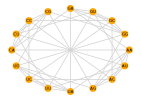

In [118]:
graphExampleCircle(2)

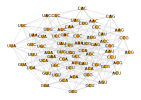

In [123]:
graphExample(3)

---

# Random Paths without Fitness Values

## Select number of Nucleotides and create Nodes and Adjacency Matrix 

In [89]:
const L=7;
nodes₁ = makeNodeTuples(L);
nodeList₁ = makeNodeList(nodes₁);
adjMatrix₁,rndMatrix₁ = makeAdjMatrix(nodes₁);

## Randomly try various paths through nodes with Hamming Distance = 1

In [134]:
@time pathCountₓ, pathListₓ = identifyPaths(10000, 1, Int(length(nodes₁)*3/4), nodeList₁, rndMatrix₁, adjMatrix₁, 0 );

Median Path Length: 11846.5
Maximum Path Length: 172245
Minimum Path Length: 9
87358.799915 seconds (1.91 G allocations: 20.847 TiB, 2.18% gc time)


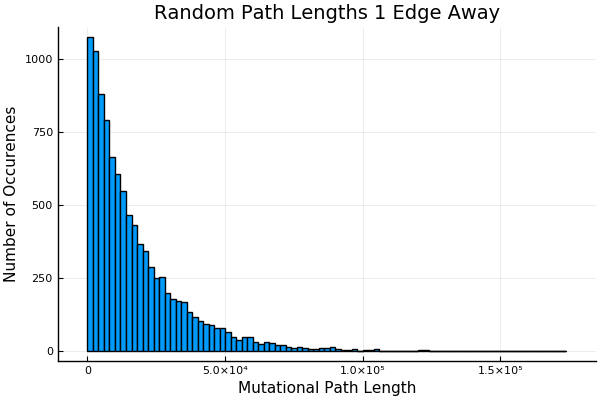

In [157]:
histogram(pathCount₁, title="Random Path Lengths 1 Edge Away",
    xlabel="Mutational Path Length", ylabel="Number of Occurences", label="")

***

# Random Paths of Limited Fitness Values Gradients 

## Import fitness values from empirical study, make adjacency matrix of positive gradients

In [91]:
fvDict₂ = addFitnessValues("fitness_Values.csv");

In [92]:
@time fvMatrix₂ = makeFitAdjMatrix(fvDict₂);

110.032459 seconds (788.38 k allocations: 6.015 GiB, 0.01% gc time)


## Test to see if the path is viable

In [93]:
fvDict₂[1],fvDict₂[Int(length(fvDict₂)*3/4)]

(Pair{Any,Any}("AAAAAAA", 0.007), Pair{Any,Any}("GUUUUUU", 0.0023))

In [204]:
@time pathTest₂ = makeFitPath(1, Int(length(fvDict₂)*3/4), fvDict₂, fvMatrix₂, .99);
pathTest₂[end]

  0.008983 seconds (277 allocations: 3.638 MiB)


"XXXXXXX"

## Randomly try various paths through nodes with Hamming Distance = 1

In [135]:
@time pathCountᵢ , pathListᵢ = identifyFitnessPaths(10000, 1, Int(length(fvDict)*3/4), fvDict₂, fvMatrix₂,.99);

Median Path Length: 10082.0
Maximum Path Length: 123374
Minimum Path Length: 12
75722.861506 seconds (1.72 G allocations: 17.297 TiB, 2.28% gc time)


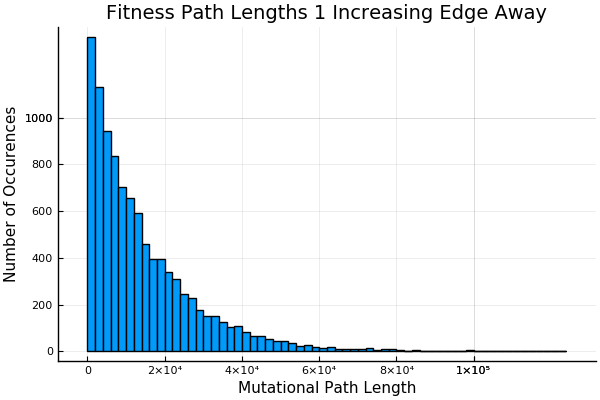

In [158]:
histogram(pathCount₂, title="Fitness Path Lengths 1 Increasing Edge Away",
    xlabel="Mutational Path Length", ylabel="Number of Occurences",label="")

In [191]:
shortPath₂ = shortPath(pathList₂,pathCount₂,7)

12-element Array{String,1}:
 "AAAAAAA"
 "AAAAAGA"
 "AAGAAGA"
 "AAGGAGA"
 "AAGUAGA"
 "AAGUUGA"
 "ACGUUGA"
 "ACGUUUA"
 "AUGUUUA"
 "GUGUUUA"
 "GUUUUUA"
 "GUUUUUU"

## Identify distribution of popular nodes through short paths

In [141]:
nodeList₂,nodeCount₂ = findShortPathNodes(pathList₂,pathCount₂,length(fvDict₂[1][1]));

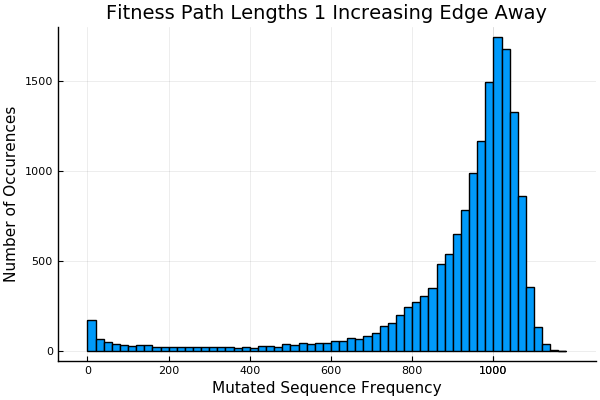

In [159]:
histogram(nodeCount₂[3:end], title="Fitness Path Lengths 1 Increasing Edge Away",
    xlabel="Mutated Sequence Frequency", ylabel="Number of Occurences",label="")

In [146]:
maximum(nodeCount₂)

2899

In [150]:
nodeList₂[findall(x -> x == maximum(nodeCount₂),nodeCount₂)]

1-element Array{Pair{String,Int64},1}:
 "AAAAAAA" => 2899

In [152]:
nodeList₂[3]

"GAUCCUC" => 1168

In [153]:
nodeCount₂[3]

1168

In [137]:
filename₁ = "random10000.csv"
open(filename₁,"w") do f
    for i in eachindex(pathCount₁)
        n1 = pathCount₁[i]
        n2 = pathList₁[i]
        write(f, "$n1, $n2 \n")
    end
end
close(filename₁)

In [138]:
filename₁ = "randomfv10000.csv"
open(filename₁,"w") do f
    for i in eachindex(pathCount₁)
        n1 = pathCount₂[i]
        n2 = pathList₂[i]
        write(f, "$n1, $n2 \n")
    end
end
close(filename₁)